In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('Heart_Attack_Risk_Levels_Dataset.csv')

# Remove heart rate outliers
df = df[df['Heart rate'] < 200]  # Remove absurd heart rates >200

# Label encode categorical variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Result'] = le.fit_transform(df['Result'])
df['Risk_Level'] = le.fit_transform(df['Risk_Level'])
df['Recommendation'] = le.fit_transform(df['Recommendation'])

# Final look
print(df.head())


   Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  \
0   63       1          66                      160                        83   
1   20       1          94                       98                        46   
2   56       1          64                      160                        77   
3   66       1          70                      120                        55   
4   54       1          64                      112                        65   

   Blood sugar  CK-MB  Troponin  Result  Risk_Level  Recommendation  
0        160.0   1.80     0.012       0           2               2  
1        296.0   6.75     1.060       1           0               0  
2        270.0   1.99     0.003       0           2               2  
3        270.0  13.87     0.122       1           0               0  
4        300.0   1.08     0.003       0           2               2  


In [6]:
#Hypothesis Test
from scipy.stats import f_oneway, ttest_ind

# ANOVA
groups = [group['Blood sugar'].values for name, group in df.groupby('Risk_Level')]
anova_result = f_oneway(*groups)
print('ANOVA Result:', anova_result)

# T-test
pos = df[df['Result'] == 1]['CK-MB']
neg = df[df['Result'] == 0]['CK-MB']
ttest_result = ttest_ind(pos, neg)
print('T-Test Result:', ttest_result)


ANOVA Result: F_onewayResult(statistic=np.float64(70.87610450301156), pvalue=np.float64(5.8856922160513e-30))
T-Test Result: TtestResult(statistic=np.float64(8.098715151242104), pvalue=np.float64(1.2565784329840927e-15), df=np.float64(1314.0))


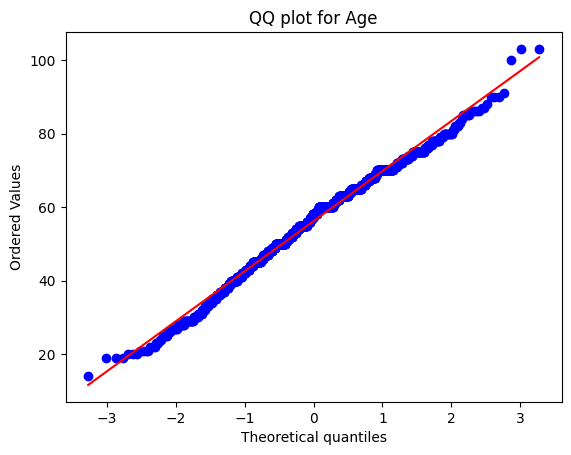

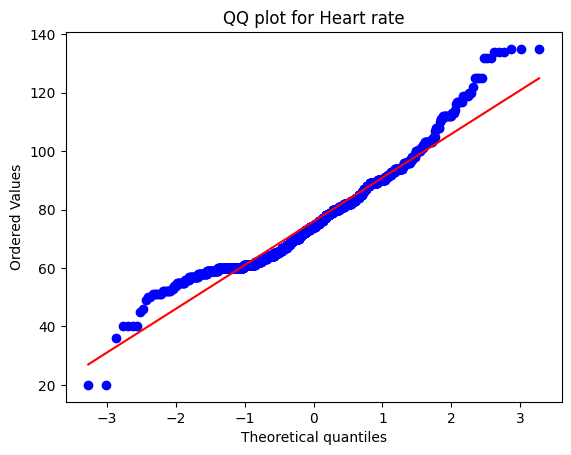

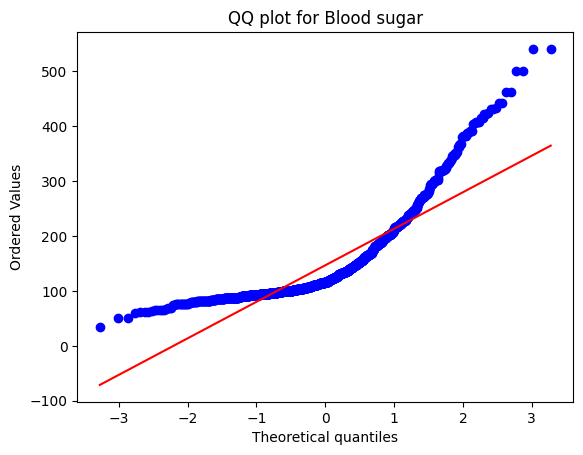

In [7]:
#Probability and Normal Distribution

import scipy.stats as stats

# QQ plot
for col in ['Age', 'Heart rate', 'Blood sugar']:
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'QQ plot for {col}')
    plt.show()


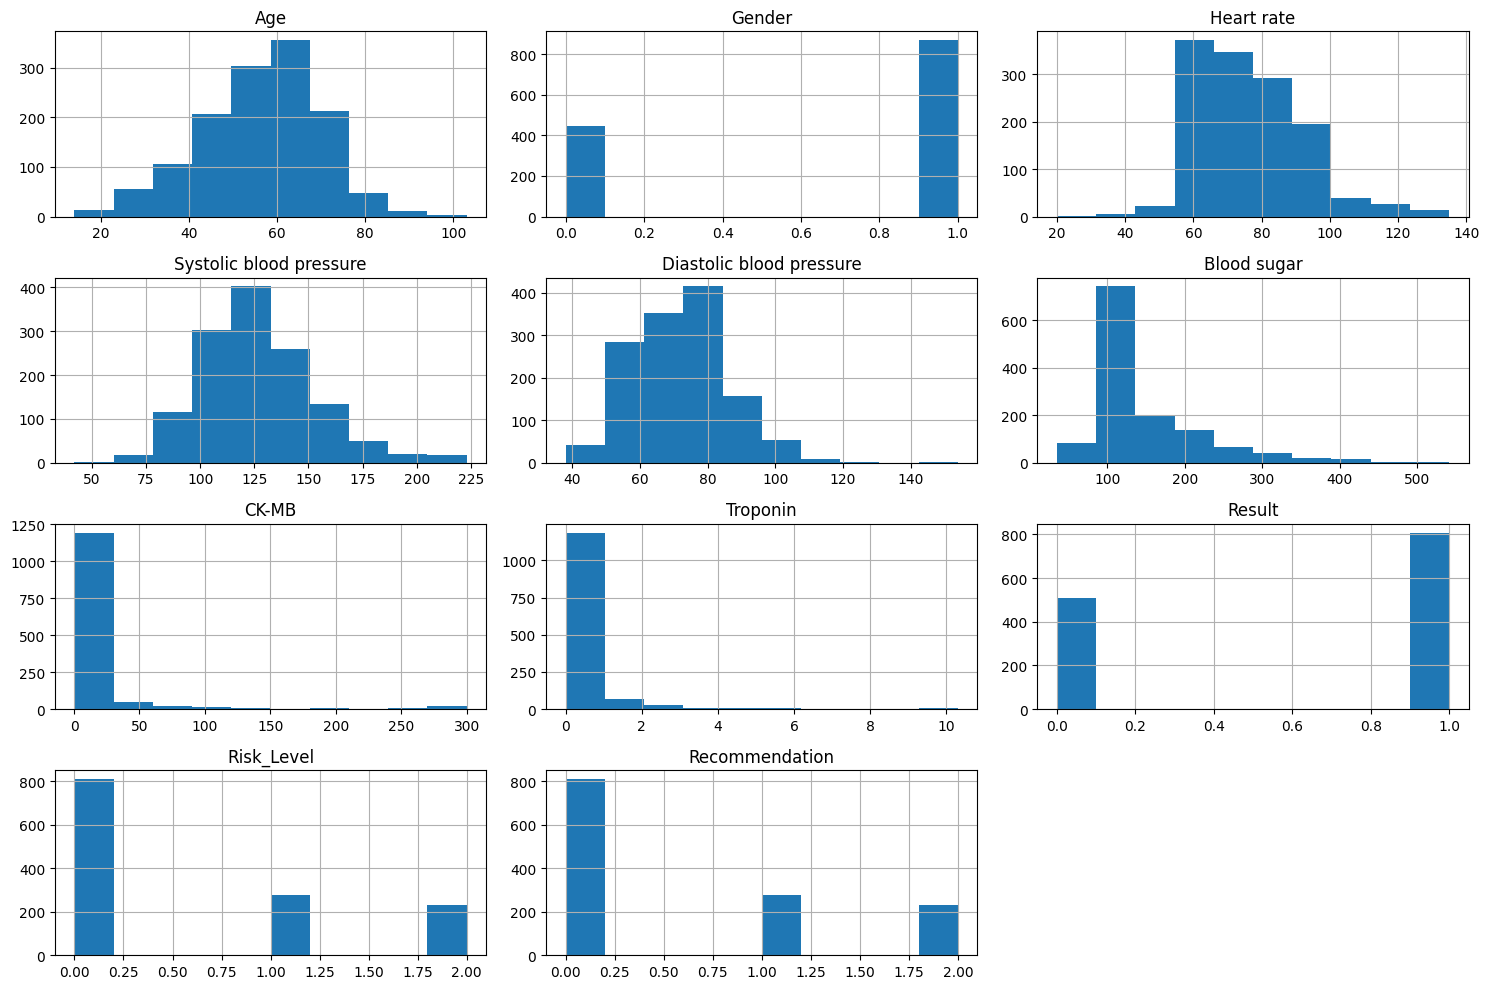

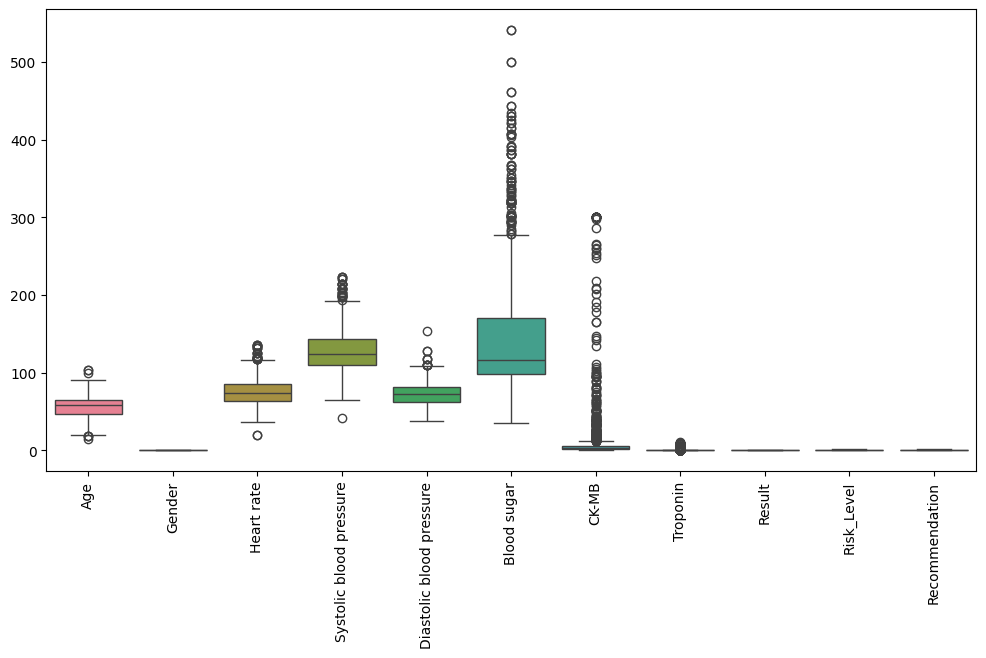

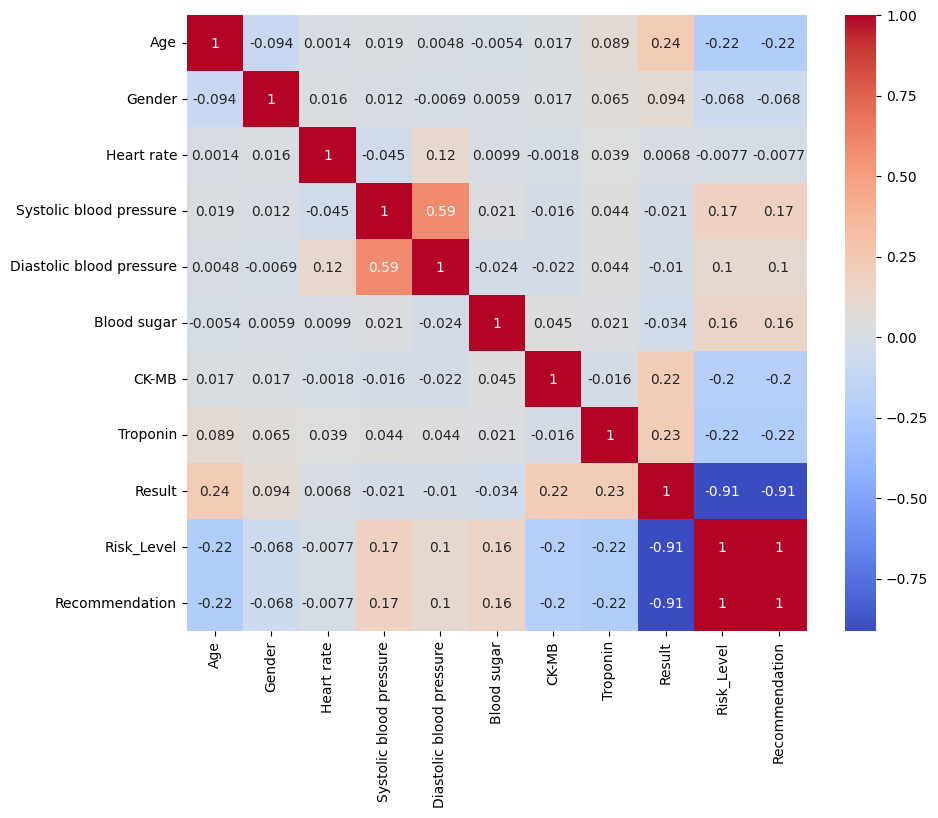

In [8]:
#Exploratory Data Analysis
# Histograms
df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

# Boxplot for outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [9]:
#Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = df['CK-MB']
X = df[['Age', 'Heart rate', 'Blood sugar']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print('Score:', model.score(X_test, y_test))


Score: -0.0122209196537717


In [10]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

y = df['Result']
X = df[['Age', 'Heart rate', 'Blood sugar']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy:', logreg.score(X_test, y_test))


Accuracy: 0.6379746835443038


In [15]:
#Clustering(Kmean)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['Age', 'Heart rate', 'Blood sugar']])

df['Cluster'] = kmeans.labels_


In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Plot clusters
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster'], cmap='viridis')
plt.title('KMeans Clusters')
plt.show()


NameError: name 'X_scaled' is not defined

In [17]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

print('Accuracy:', tree.score(X_test, y_test))


Accuracy: 0.5620253164556962


In [18]:
#Ramdom Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print('Accuracy:', rf.score(X_test, y_test))


Accuracy: 0.579746835443038


In [19]:
#Support Vector Machine
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

print('Accuracy:', svm.score(X_test, y_test))


Accuracy: 0.610126582278481


In [20]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

print('Accuracy:', ada.score(X_test, y_test))


Accuracy: 0.6227848101265823


In [21]:
import pickle

# Example: Save your model
pickle.dump(model, open('Project.pkl', 'wb'))

# To load it again later:
# model = pickle.load(open('model.pkl', 'rb'))
